In [28]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
import numpy as np 
import os
import qiskit

In [2]:
h_sim=supermarq.hamiltonian_simulation.HamiltonianSimulation(4)
h_sim_circuit = h_sim.qiskit_circuit()
h_sim_circuit.draw()

┌───┐┌───────────┐┌───┐                           ┌─┐                 »
q_0: ┤ H ├┤ Rz(-3π/4) ├┤ H ├──■────────────────■───────┤M├─────────────────»
     ├───┤├───────────┤├───┤┌─┴─┐┌──────────┐┌─┴─┐     └╥┘                 »
q_1: ┤ H ├┤ Rz(-3π/4) ├┤ H ├┤ X ├┤ Rz(-π/2) ├┤ X ├──■───╫───────────────■──»
     ├───┤├───────────┤├───┤└───┘└──────────┘└───┘┌─┴─┐ ║ ┌──────────┐┌─┴─┐»
q_2: ┤ H ├┤ Rz(-3π/4) ├┤ H ├──────────────────────┤ X ├─╫─┤ Rz(-π/2) ├┤ X ├»
     ├───┤├───────────┤├───┤                      └───┘ ║ └──────────┘└───┘»
q_3: ┤ H ├┤ Rz(-3π/4) ├┤ H ├────────────────────────────╫──────────────────»
     └───┘└───────────┘└───┘                            ║                  »
c: 4/═══════════════════════════════════════════════════╩══════════════════»
                                                        0                  »
«                                    
«q_0: ───────────────────────────────
«          ┌─┐                       
«q_1: ─────┤M├───────────────────────
«          └╥┘                 ┌─┐   
«q_2: ──■───╫───────────────■──┤M├───
«     ┌─┴─┐ ║ ┌──────────┐┌─┴─┐└╥┘┌─┐
«q_3: ┤ X ├─╫─┤ Rz(-π/2) ├┤ X ├─╫─┤M├
«     └───┘ ║ └──────────┘└───┘ ║ └╥┘
«c: 4/══════╩═══════════════════╩══╩═
«           1                   2  3

In [3]:
emulator = Aer.get_backend('aer_simulator_density_matrix')

In [4]:
qc = transpile(h_sim_circuit, emulator)
job = execute(qc, emulator, shots=8192, memory=False)
data=job.result()
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [5]:
data = job.result()
data

Result(backend_name='aer_simulator', backend_version='0.13.0', qobj_id='', job_id='dce38a6f-c02d-4d94-b12a-87e657e78f2e', success=True, results=[ExperimentResult(shots=8192, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 3, '0x2': 31, '0xb': 742, '0x7': 708, '0x3': 129, '0x4': 32, '0xf': 4376, '0x1': 21, '0xd': 738, '0xe': 751, '0x9': 134, '0x5': 138, '0xc': 119, '0x6': 121, '0x8': 25, '0xa': 124}), header=QobjExperimentHeader(creg_sizes=[['c', 4]], global_phase=0.0, memory_slots=4, n_qubits=4, name='circuit-158', qreg_sizes=[['q', 4]], metadata={}), status=DONE, seed_simulator=322305187, metadata={'time_taken': 0.045343261, 'num_bind_params': 1, 'parallel_state_update': 24, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[3, 3], [2, 2], [1, 1], [0, 0]], 'method': 'density_matrix', 'device': 'CPU', 'num_qubits': 4, 'sample_measure_time': 0.000972121, 'active_input_qubits': [0, 1, 2, 3], 'num_clbits': 4, 'remapped_qubits': False, 'runtime_paramete

In [15]:
counts = job.result().get_counts()
print(counts)

{'01100': 2, '01010': 1, '11001': 18, '10100': 3, '10011': 11, '01110': 19, '00011': 5, '00111': 18, '11000': 1, '11111': 457, '10110': 20, '01111': 77, '11101': 64, '01011': 13, '11110': 84, '11011': 73, '00110': 3, '01101': 13, '00101': 2, '10001': 3, '01001': 2, '11010': 13, '10101': 17, '11100': 15, '10111': 65, '10010': 1}


In [16]:
score = h_sim.score(counts)
print(score)

0.9972466094067258


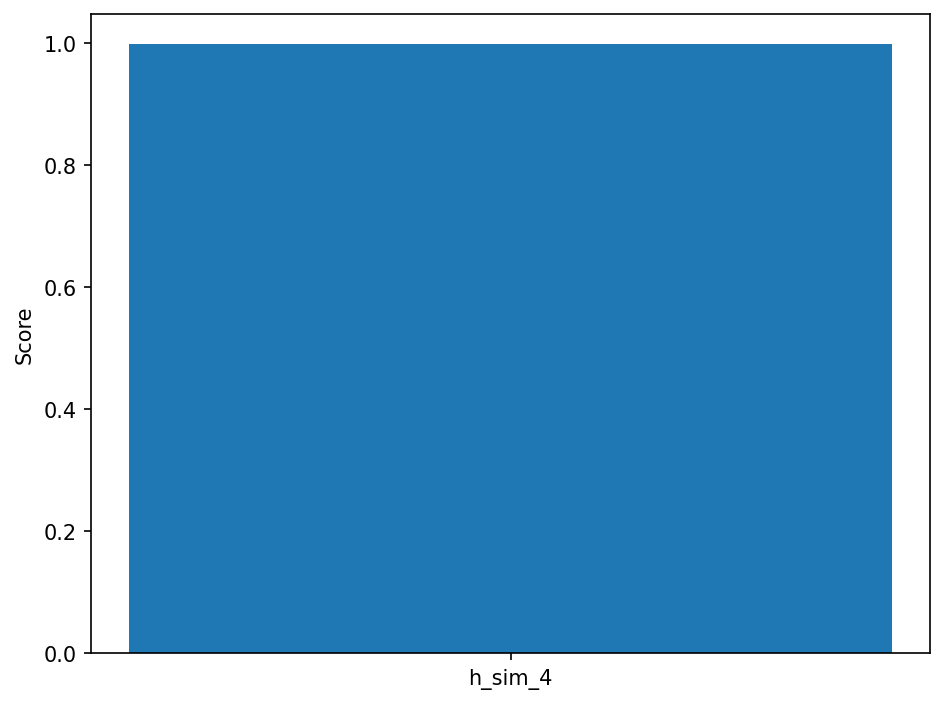

In [17]:
supermarq.plotting.plot_results([score], ["h_sim_4"])

[0.5, 1.0, 0.2857142857142857, 0.5625, 0.0, 0.25]
--------------------------------------------------------------


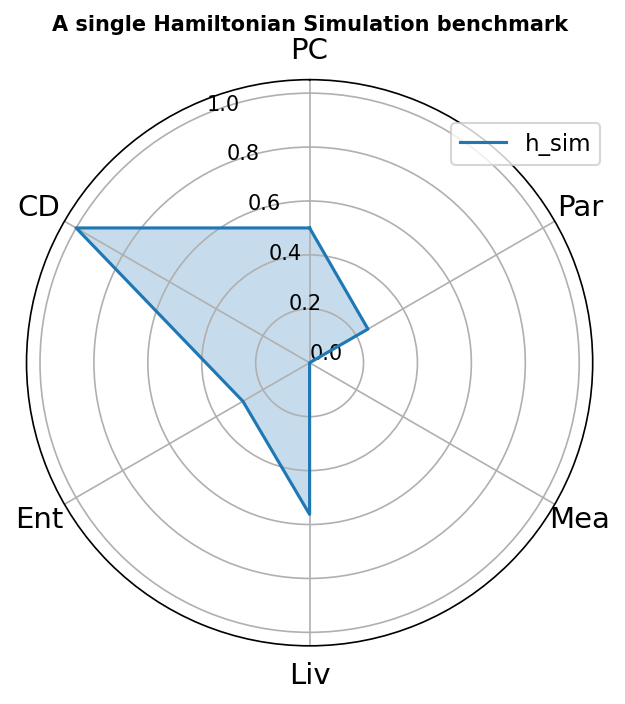

In [32]:
h_sim_features = [
    supermarq.converters.compute_communication_with_qiskit(h_sim_circuit),
    supermarq.converters.compute_depth_with_qiskit(h_sim_circuit),
    supermarq.converters.compute_entanglement_with_qiskit(h_sim_circuit),
    supermarq.converters.compute_liveness_with_qiskit(h_sim_circuit),
    supermarq.converters.compute_measurement_with_qiskit(h_sim_circuit),
    supermarq.converters.compute_parallelism_with_qiskit(h_sim_circuit),
]
print(h_sim_features)
print("--------------------------------------------------------------")
supermarq.plotting.plot_benchmark(
    ["A single Hamiltonian Simulation benchmark", ["h_sim"], [h_sim_features]],
    spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],
)

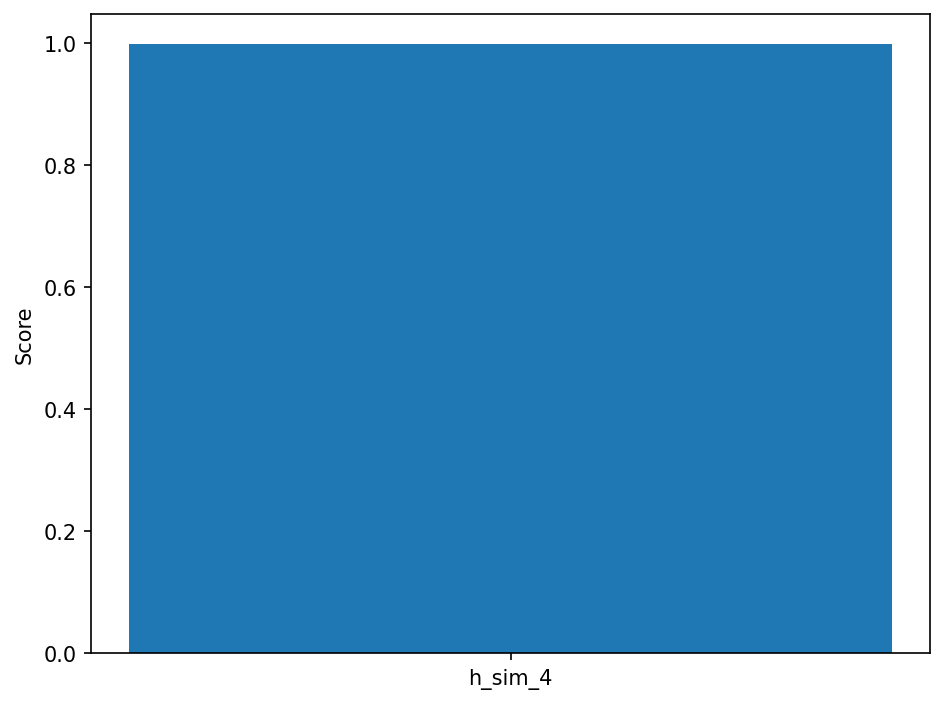

In [19]:
supermarq.plotting.plot_results([score], ["h_sim_4"])

In [20]:
benchmark_features = {}
benchmarks = [(supermarq.hamiltonian_simulation.HamiltonianSimulation(4), "hsim4"),(supermarq.hamiltonian_simulation.HamiltonianSimulation(5), "h_sim_5"),]

for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'hsim4': [0.5, 1.0, 0.2857142857142857, 0.5961538461538461, 0.0, 0.20512820512820515], 'h_sim_5': [0.4, 1.0, 0.2962962962962963, 0.5, 0.0, 0.171875]}


In [22]:
jobs = []
for benchmark, label in benchmarks:
    job = emulator.run(benchmark.qiskit_circuit(), shots=1000)
    jobs.append((label, job, benchmark))
jobs

[('hsim4',
  <supermarq.benchmarks.hamiltonian_simulation.HamiltonianSimulation at 0x7d1d230afa30>),
 ('h_sim_5',
  <supermarq.benchmarks.hamiltonian_simulation.HamiltonianSimulation at 0x7d1d2167fca0>)]

In [23]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [30]:
device_scores = {}
for label, job, benchmark in jobs:
    if job.status() == qiskit.providers.jobstatus.JobStatus.DONE:
        counts = job.result(0).get_counts()
        print(counts)
        score = benchmark.score(counts)
        print(score)
        device_scores[label] = score
    else:
        print(label, "not done!")

{'0010': 3, '0001': 2, '1111': 511, '1011': 82, '0011': 13, '0111': 92, '1110': 99, '1000': 4, '0110': 16, '1101': 97, '0100': 2, '1100': 20, '0101': 16, '1001': 15, '0000': 1, '1010': 27}
0.9911966094067258
{'01010': 1, '10100': 1, '00010': 1, '11001': 11, '01011': 17, '01001': 2, '10001': 3, '11010': 15, '00101': 2, '10000': 2, '11011': 72, '01111': 82, '10110': 18, '00011': 2, '00111': 14, '11101': 97, '11000': 7, '11111': 420, '10010': 1, '10101': 10, '11100': 15, '10111': 84, '11110': 76, '01110': 9, '10011': 15, '01101': 19, '01000': 1, '00110': 3}
0.9906466094067257


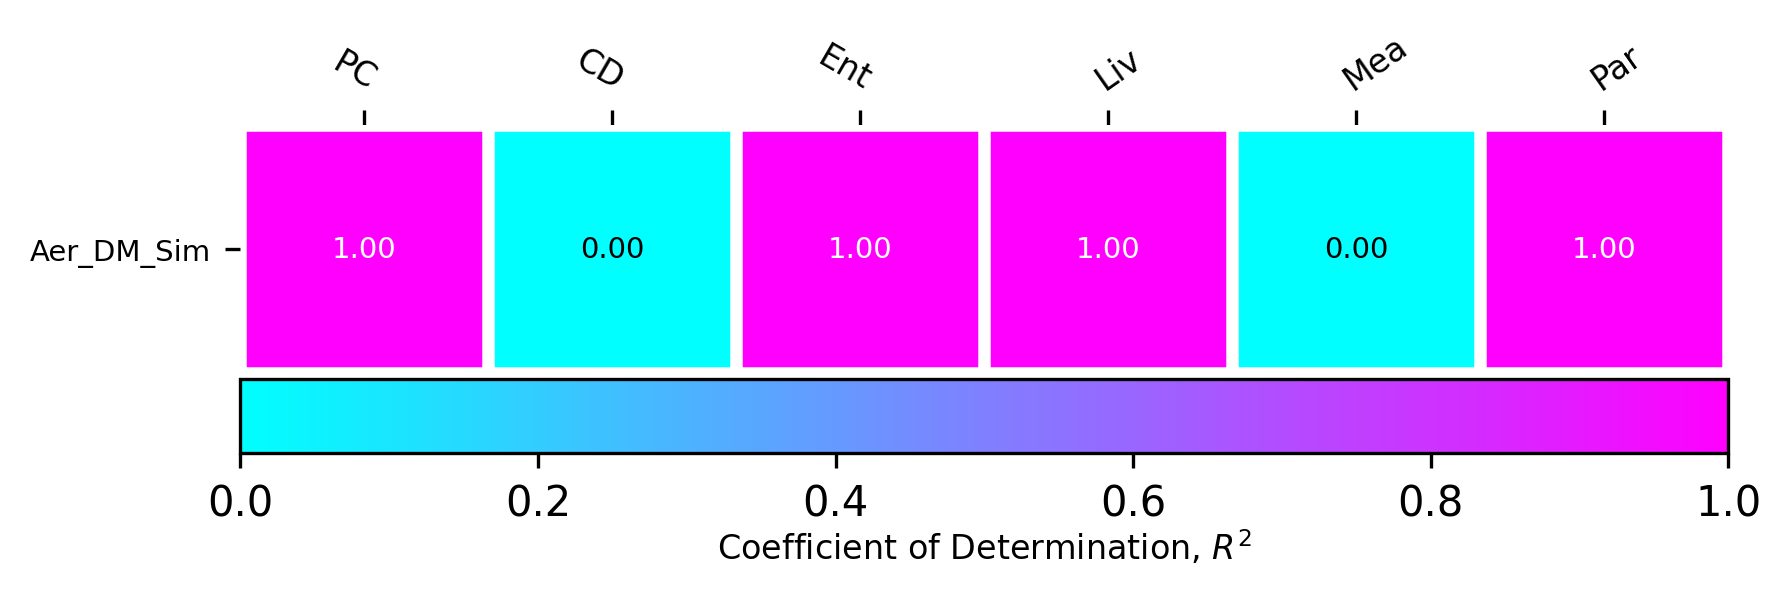

In [31]:
supermarq.plotting.plot_correlations(benchmark_features,
    device_scores,
    ["PC", "CD", "Ent", "Liv", "Mea", "Par"],
    device_name="Aer_DM_Sim",)